# Utils

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward_plain(x):
    # Doesn't split the FT into real and imaginary and doesn't clip it.
    if len(x.shape) == 1:

        x = x.reshape((1, -1))

    x_numpy     = x.detach().float()
    X_fft       = [np.fft.fftshift(np.fft.fft(x_numpy[k, :])) for k in range(x.shape[0])]
    X_fft_train = np.array(X_fft)

    x_fft = torch.from_numpy(X_fft_train).float()

    return x_fft

In [3]:
def forward(x):

    """forward steps
    
    Step 1: Convert the input vector to numpy format
    
    Step 2: Apply FFT in numpy with FFTshift to center the spectrum around 0
    
    Step 3: Crop the spectrum by removing half of the real and imaginary components. Note that the FFT output size 
            is 2 * N_fft because the DFT output is complex-valued rather than real-valued. After cropping, the size 
            remains N_fft, similar to the input time-domain signal. In this step we also normalize the spectrum by N_fft
    
    Step 4: Convert spectrum back to torch tensor format
    
    Step 5: Compute the flow likelihood and Jacobean. Because DFT is a Vandermonde linear transform, Log-Jacob-Det = 0
    
    """

    if len(x.shape) == 1:

        x = x.reshape((1, -1))

    x_numpy     = x.detach().float()
    X_fft       = [np.fft.fftshift(np.fft.fft(x_numpy[k, :])) for k in range(x.shape[0])]
    X_fft_train = np.array(
        [
            np.array(
                [np.real(X_fft[k])[: (int(100 / 2) + 1)] / 100, np.imag(X_fft[k])[: (int(100 / 2) + 1)] / 100]
            )
            for k in range(len(X_fft))
        ]
    )
    x_fft = torch.from_numpy(X_fft_train).float()


    return x_fft

# Data loading and inspection

In [4]:
data = np.load("/Users/hristogeorgiev/Desktop/Fourier-flows/data/custom_380_sines_6w_correlated_final_train.npz")["arr_0"]
#data = np.load("data/1w_380sp.npz")["data"]
x    = data[0,:,:]
#x[:, [0, 1]] = x[:, [1, 0]]

x_fft's shape:  torch.Size([380, 2, 6])


Text(0.5, 1.0, "X's imaginary component")

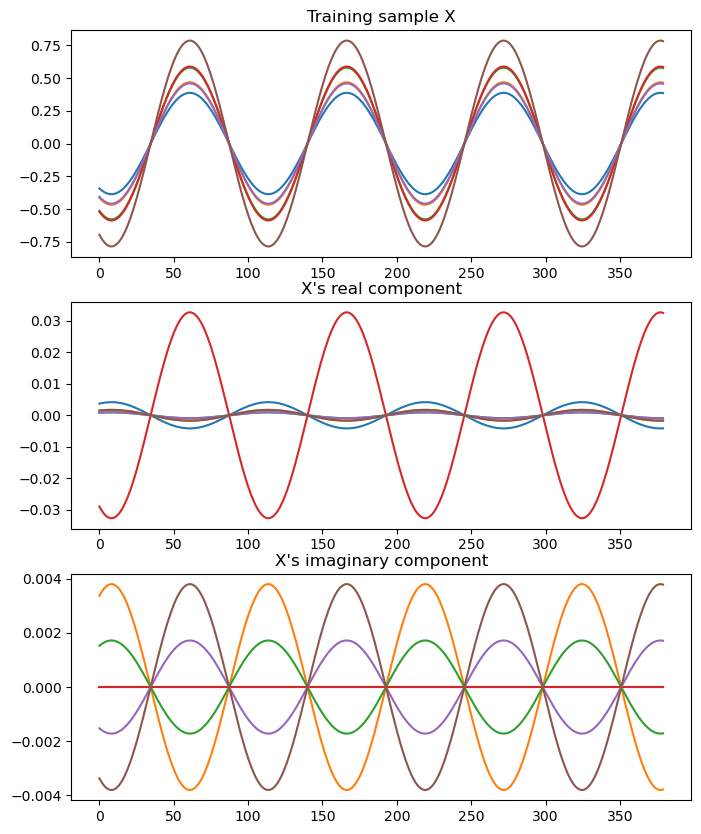

In [5]:
x_fft = forward(torch.from_numpy(x))
print("x_fft's shape: ", x_fft.shape)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

axes[0].plot(x)
axes[0].set_title("Training sample X")

axes[1].plot(x_fft[:,0,:])
axes[1].set_title("X's real component")
#axes[1].set_yscale("log")

axes[2].plot(x_fft[:,1,:])
axes[2].set_title("X's imaginary component")
#axes[2].set_yscale("log")

x_fft's shape:  torch.Size([380, 6])


/var/folders/gw/hqyqdgms0r7gq8wmx2x6sksh0000gn/T/ipykernel_993/2840684408.py:11: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:300.)
  x_fft = torch.from_numpy(X_fft_train).float()


Text(0.5, 1.0, 'FT(X)')

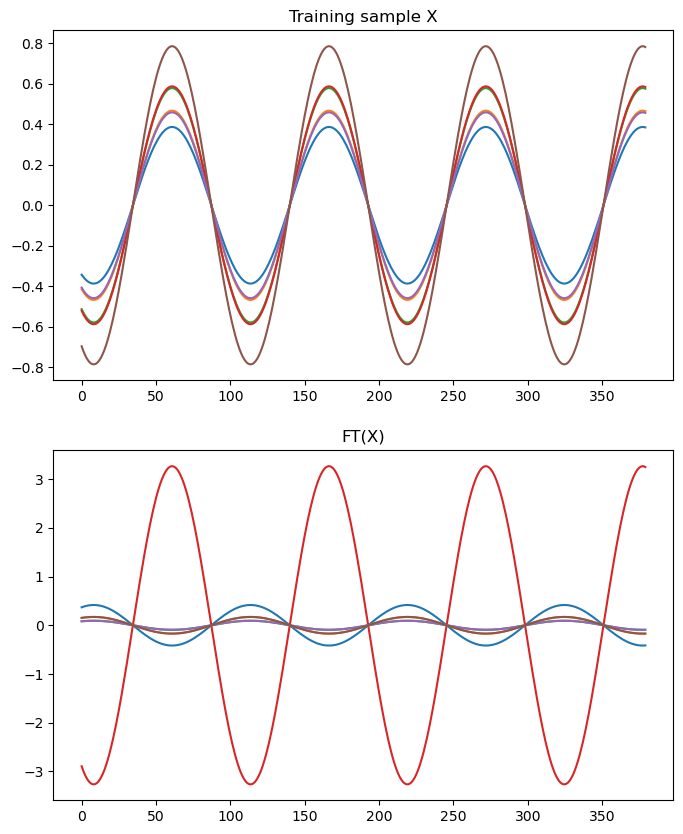

In [6]:
x_fft = forward_plain(torch.from_numpy(x))
print("x_fft's shape: ", x_fft.shape)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

axes[0].plot(x)
axes[0].set_title("Training sample X")

axes[1].plot(x_fft)
axes[1].set_title("FT(X)")
#axes[1].set_yscale("log")

# Visualization

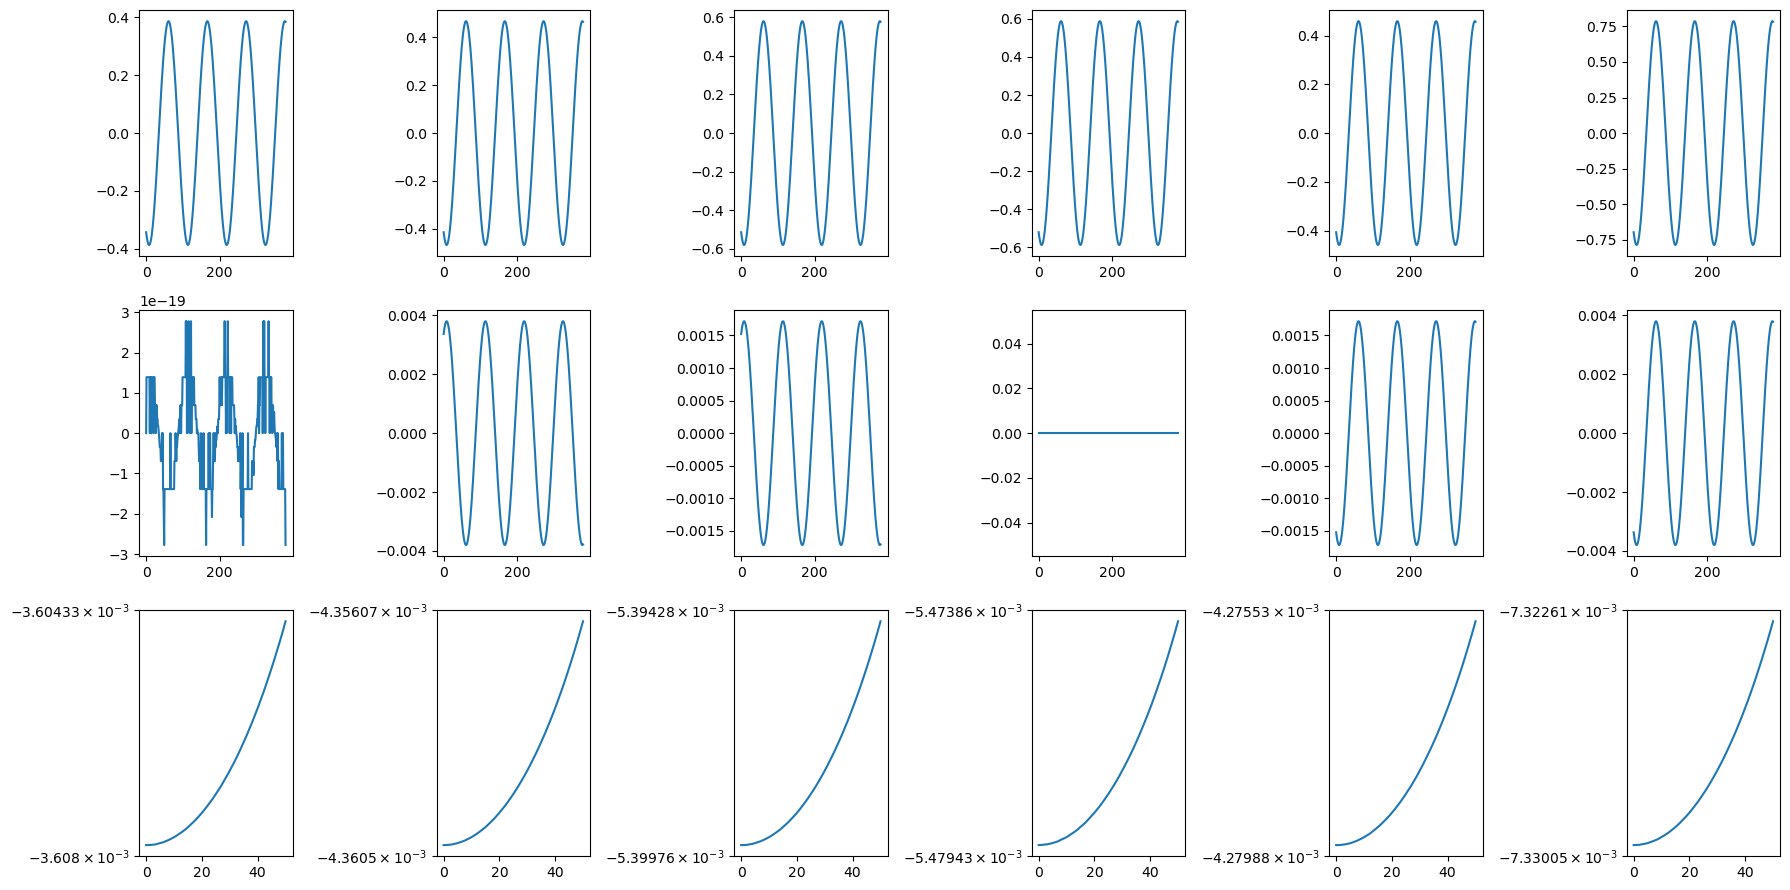

In [10]:
# Create a figure
fig = plt.figure(figsize=(18, 9))

# Define the number of rows and columns
nrows = 3
ncols = 6

x_fft = forward(torch.from_numpy(x))

# Iterate over each row and column
for row in range(nrows):
    for col in range(ncols):
        # Calculate the index of the current subplot
        index = row * ncols + col + 1
        
        # Create a subplot in the current position (index)
        ax = fig.add_subplot(nrows, ncols, index)
        
        # Customize each subplot based on the row and column
        if row == 0:
            # Row 1: Plot some random data as an example
            ax.plot(x[:,col])
        
        elif row == 1:
            # Row 2: Plot another set of data (e.g., cos waves)
            ax.plot(x_fft[:,1,col])
        
        elif row == 2:
            x_fft_single = forward(torch.from_numpy(x[:,col]))
            #print("x_fft_single's shape: ", x_fft_single.shape)
            ax.plot(x_fft_single[0,1,:])
            ax.set_yscale("symlog")
        
# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the grid of subplots
plt.show()


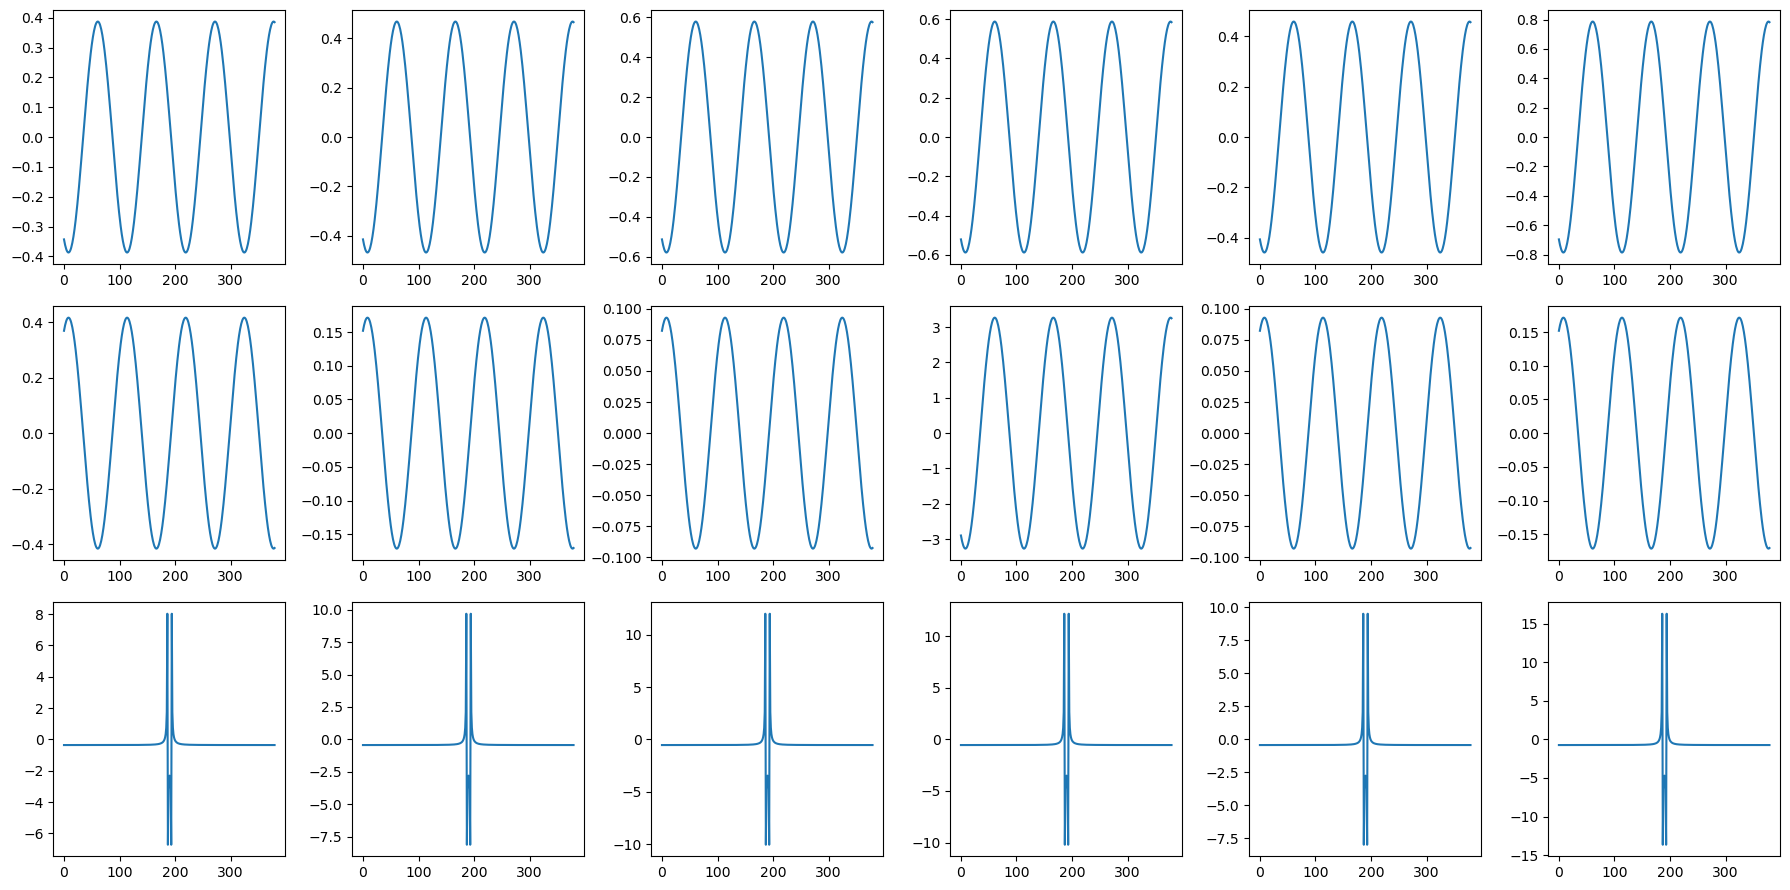

In [8]:
# Create a figure
fig = plt.figure(figsize=(18, 9))

# Define the number of rows and columns
nrows = 3
ncols = 6

x_fft = forward_plain(torch.from_numpy(x))

# Iterate over each row and column
for row in range(nrows):
    for col in range(ncols):
        # Calculate the index of the current subplot
        index = row * ncols + col + 1
        
        # Create a subplot in the current position (index)
        ax = fig.add_subplot(nrows, ncols, index)
        
        # Customize each subplot based on the row and column
        if row == 0:
            # Row 1: Plot some random data as an example
            ax.plot(x[:,col])
        
        elif row == 1:
            # Row 2: Plot another set of data (e.g., cos waves)
            ax.plot(x_fft[:,col])

        elif row == 2:
            x_fft_single = forward_plain(torch.from_numpy(x[:,col]))
            #print("x_fft_single's shape: ", x_fft_single.shape)
            ax.plot(x_fft_single[0,:])
        
        
# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the grid of subplots
plt.show()
